In [4]:
import os
import time
import librosa
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import *

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from xgboost import XGBClassifier
# path 
os.chdir('D:\Study\Code\Python\Sound_Classification_Bee_Qeen_Queenless')
from pystacknet.pystacknet.pystacknet import StackNetClassifier

import warnings
warnings.filterwarnings('ignore')

In [5]:
path = os.getcwd() + "/dataset/"
path

'D:\\Study\\Code\\Python\\Sound_Classification_Bee_Qeen_Queenless/dataset/'

In [6]:
TRAINING_DIR = path+"/train"
VALIDATION_DIR = path + "/val"
TEST_DIR = path + "/test"

print(TRAINING_DIR)
print(VALIDATION_DIR)
print(TEST_DIR)

D:\Study\Code\Python\Sound_Classification_Bee_Qeen_Queenless/dataset//train
D:\Study\Code\Python\Sound_Classification_Bee_Qeen_Queenless/dataset//val
D:\Study\Code\Python\Sound_Classification_Bee_Qeen_Queenless/dataset//test


In [7]:
def data_loader(path):
    X = []
    Y = []
    for folder in os.listdir(path):
        for file in os.listdir(os.path.join(path, folder)):
            feature = np.load(os.path.join(path, folder, file))
            label = folder
            X.append(feature)
            Y.append(label)
    return X, Y

In [8]:
X_train, Y_train = data_loader(TRAINING_DIR)
X_val, Y_val = data_loader(VALIDATION_DIR)
X_test, Y_test = data_loader(TEST_DIR)

In [9]:
print("There are {} training samples and {} training labels".format(len(X_train), len(Y_train)))
print("There are {} validation samples and {} validation labels".format(len(X_val), len(Y_val)))
print("There are {} testing samples and {} testing labels".format(len(X_test), len(Y_test)))

There are 14000 training samples and 14000 training labels
There are 2000 validation samples and 2000 validation labels
There are 4000 testing samples and 4000 testing labels


In [10]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_val = np.array(Y_val)
Y_test = np.array(Y_test)

print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_val: {}".format(X_val.shape))
print("Shape of X_test: {}".format(X_test.shape))

Shape of X_train: (14000, 64575)
Shape of X_val: (2000, 64575)
Shape of X_test: (4000, 64575)


In [11]:
# shuffle the dataset
shuffle_index = np.random.permutation(len(X_train))
X_train, Y_train = X_train[shuffle_index], Y_train[shuffle_index]
shuffle_index = np.random.permutation(len(X_val))
X_val, Y_val = X_val[shuffle_index], Y_val[shuffle_index]
shuffle_index = np.random.permutation(len(X_test))
X_test, Y_test = X_test[shuffle_index], Y_test[shuffle_index]

In [12]:
label_encoder = LabelEncoder()
Y_train = label_encoder.fit_transform(Y_train)
Y_val = label_encoder.fit_transform(Y_val)
Y_test = label_encoder.fit_transform(Y_test)

In [13]:
# models = [
#     RandomForestClassifier(max_depth=10, n_estimators=100, max_features=16, criterion='entropy', mean_samples_split=5),
#     RandomForestClassifier(max_depth=10, n_estimators=50, max_features=254, criterion='gini, mean_samples_split=2'),
#     KNeighborsClassifier(n_neighbors=10, weights='distance', algorithm='auto'),
#     KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='auto'),
#     SVC(C=1.0, kernel='rbf', gamma='scale'),
#     SVC(C=10, kernel='rbf', gamma='scale'),
#     ExtraTreesClassifier(max_depth=10, n_estimators=100, max_features=16, criterion='entropy', mean_samples_split=5),
#     XGBClassifier(max_depth=10, n_estimators=500, learning_rate=0.01, subsample=0.8, colsample_bytree=0.8, gamma = 0.1),
#     GradientBoostingClassifier(max_depth=10, n_estimators=100, learning_rate=0.01, subsample=0.5, min_impurity_decrease = 0.1),
#     AdaBoostClassifier(n_estimators=500, learning_rate=0.1, bootstrap=True, criterion='entropy')    
# ]

In [14]:
model = StackNetClassifier([
                                    [RandomForestClassifier(max_depth=10, n_estimators=100, max_features=254, criterion='gini', min_samples_split=5),
                                    RandomForestClassifier(max_depth=15, n_estimators=100, max_features=254, criterion='gini', min_samples_split=2),
                                    KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='auto'),
                                    KNeighborsClassifier(n_neighbors=15, weights='uniform', algorithm='auto'),
                                    MLPClassifier(hidden_layer_sizes=(100, 100, 100), activation='relu', solver='adam', alpha=0.0001, batch_size=32, learning_rate='constant', learning_rate_init=0.0001, max_iter=500),
                                    MLPClassifier(hidden_layer_sizes=(100, 100, 100), activation='relu', solver='adam', alpha=0.0001, batch_size=32, learning_rate='constant', learning_rate_init=0.0001, max_iter=1000)
                                       ],
                                    [RandomForestClassifier (n_estimators=200, criterion="gini", max_depth=10, max_features=254, random_state=42)]
                            ], 
                                   metric = 'accuracy', folds = 4, restacking = False, use_retraining = True, use_proba = True, random_state = 0, n_jobs = 1, verbose = 1)               

# learning rate: 0.01, 0.001, 0.0001
# solver: adam, adamw, lbfgs
# alpha: 0.0001, 0.001, 0.01
# bath_size: 32, 64, 128, 256        
# max_iter: 500, 1000, 1500, 2000                            
# folds = 4, 5, 6, 7, 8, 9, 10

In [15]:
# model = StackNetClassifier([
#                                     [RandomForestClassifier(max_depth=10, n_estimators=100, max_features=254, criterion='gini', min_samples_split=5),
#                                     RandomForestClassifier(max_depth=15, n_estimators=100, max_features=254, criterion='gini', min_samples_split=5),
#                                     KNeighborsClassifier(n_neighbors=10, weights='uniform', algorithm='auto'),
#                                     KNeighborsClassifier(n_neighbors=15, weights='uniform', algorithm='auto'),
#                                     MLPClassifier(hidden_layer_sizes=(100, 100, 100), activation='relu', solver='sgd', alpha=0.0001, batch_size=32, learning_rate='constant', learning_rate_init=0.0001, max_iter=500),
#                                     MLPClassifier(hidden_layer_sizes=(100, 100, 100), activation='relu', solver='sgd', alpha=0.0001, batch_size=32, learning_rate='constant', learning_rate_init=0.0001, max_iter=1000)
#                                        ],
#                                     [RandomForestClassifier (n_estimators=200, criterion="gini", max_depth=10, max_features=254, random_state=42)]
#                             ], 
#                                    metric = 'accuracy', folds = 4, restacking = False, use_retraining = True, use_proba = True, random_state = 0, n_jobs = 1, verbose = 1)               

# # learning rate: 0.01, 0.001, 0.0001
# # solver: adam, adamw, lbfgs
# # alpha: 0.0001, 0.001, 0.01
# # bath_size: 32, 64, 128, 256        
# # max_iter: 500, 1000, 1500, 2000                            
# # folds = 4, 5, 6, 7, 8, 9, 10, 30 

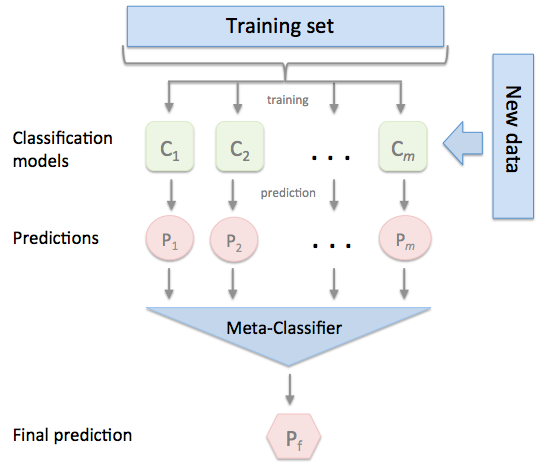

In [16]:
model.fit(X_train, Y_train)

====================== Start of Level 0 ======================
Input Dimensionality 64575 at Level 0 
6 models included in Level 0 


Level 0, fold 1/4 , model 0 , accuracy===0.827143 
Level 0, fold 1/4 , model 1 , accuracy===0.827143 
Level 0, fold 1/4 , model 2 , accuracy===0.848857 
Level 0, fold 1/4 , model 3 , accuracy===0.841714 
Level 0, fold 1/4 , model 4 , accuracy===0.906286 
Level 0, fold 1/4 , model 5 , accuracy===0.866000 
=========== end of fold 1 in level 0 ===========
Level 0, fold 2/4 , model 0 , accuracy===0.832000 
Level 0, fold 2/4 , model 1 , accuracy===0.827143 
Level 0, fold 2/4 , model 2 , accuracy===0.838857 
Level 0, fold 2/4 , model 3 , accuracy===0.838571 
Level 0, fold 2/4 , model 4 , accuracy===0.896286 
Level 0, fold 2/4 , model 5 , accuracy===0.896857 
=========== end of fold 2 in level 0 ===========
Level 0, fold 3/4 , model 0 , accuracy===0.829429 
Level 0, fold 3/4 , model 1 , accuracy===0.820571 
Level 0, fold 3/4 , model 2 , accuracy===0.843429 
Level 0, fold 3/4 , model 3 , accuracy===0.834857 
Level 0, fold 3/4 , model 4 , accuracy===0.840571 
Level 0, fold 3/4 , model 5 , accur

In [17]:
filename = 'StackNet_1D_STFT_Model.sav'
pickle.dump(model, open(filename, 'wb'))

In [18]:
train_preds = model.predict_proba(X_train)[:, 1]
val_preds = model.predict_proba(X_val)[:, 1]
test_preds = model.predict_proba(X_test)[:, 1]

====================== Start of Level 0 ======================
1 estimators included in Level 0 
====================== Start of Level 1 ======================
1 estimators included in Level 1 
====================== Start of Level 0 ======================
1 estimators included in Level 0 
====================== Start of Level 1 ======================
1 estimators included in Level 1 
====================== Start of Level 0 ======================
1 estimators included in Level 0 
====================== Start of Level 1 ======================
1 estimators included in Level 1 


In [19]:
train_score = roc_auc_score(Y_train, train_preds)
val_score = roc_auc_score(Y_val, val_preds)
test_score = roc_auc_score(Y_test, test_preds)

In [20]:
print(f"StackNet AUC on training set: {round(train_score, 4)}")
print(f"StackNet AUC on validation set: {round(val_score, 4)}")
print(f"StackNet AUC on testing set: {round(test_score, 4)}")

StackNet AUC on training set: 1.0
StackNet AUC on validation set: 0.9778
StackNet AUC on testing set: 0.9773


In [21]:
accuracy_score(Y_test, np.round(test_preds))

0.91725

In [22]:
confusion_matrix(Y_test, np.round(test_preds))

array([[1870,  130],
       [ 201, 1799]], dtype=int64)

In [23]:
print(classification_report(Y_test, np.round(test_preds)))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2000
           1       0.93      0.90      0.92      2000

    accuracy                           0.92      4000
   macro avg       0.92      0.92      0.92      4000
weighted avg       0.92      0.92      0.92      4000

